# Bayesian T-test

In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
az.style.use('arviz-darkgrid')

In this notebook we demo how to perform a Bayesian T-test

## Generate data

In [3]:
np.random.seed(2935)
a = np.random.normal(5, 2, 1000)
b = np.random.normal(8, 2.5, 1000)
df = pd.DataFrame(
    {
        'Group': ['a'] * 1000 + ['b'] * 1000,
        'Val':np.hstack([a, b])
    }
)

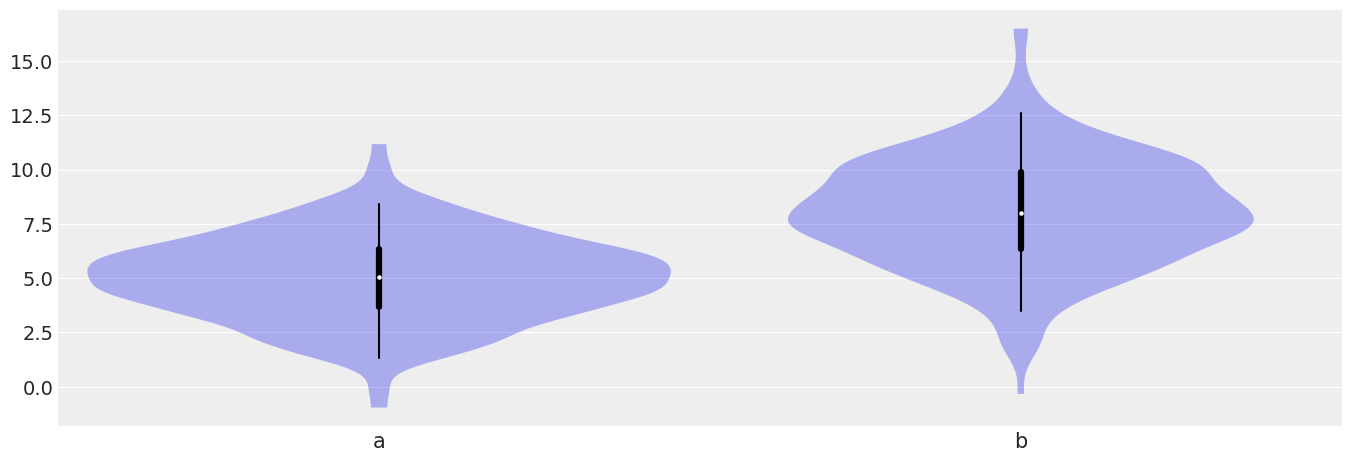

In [4]:
az.plot_violin({'a':a, "b":b});

### Analysis

In [5]:
model = bmb.Model(df)
results = model.fit('Val ~ Group')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Val_sigma, Group, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [6]:
# Here's the setup for the model
model.backend.model

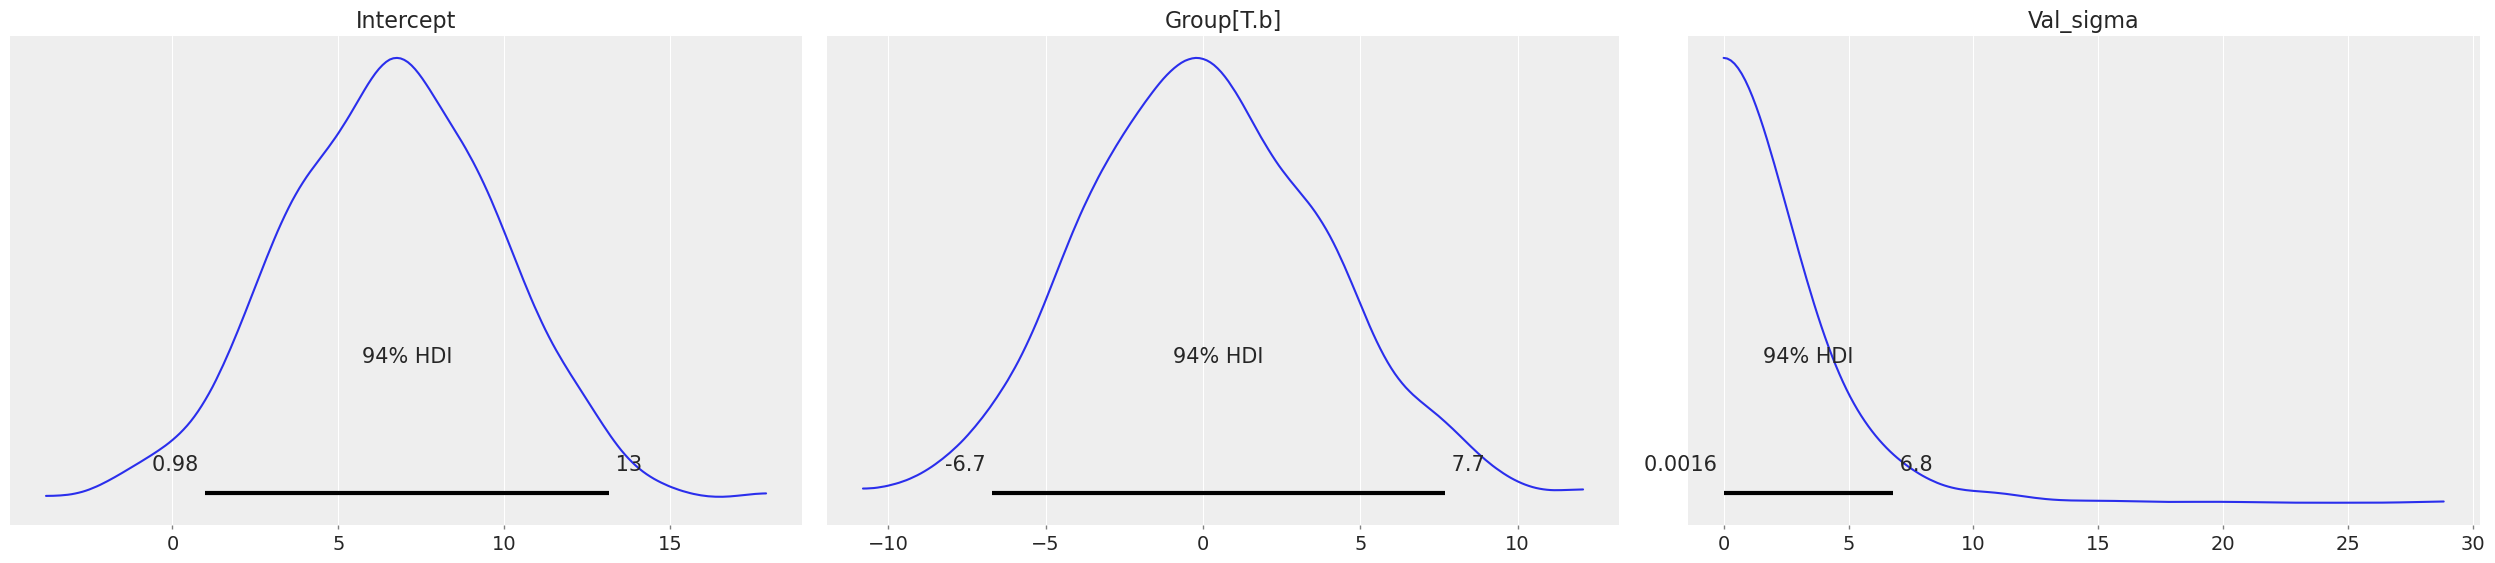

In [7]:
# Model priors
model.plot();

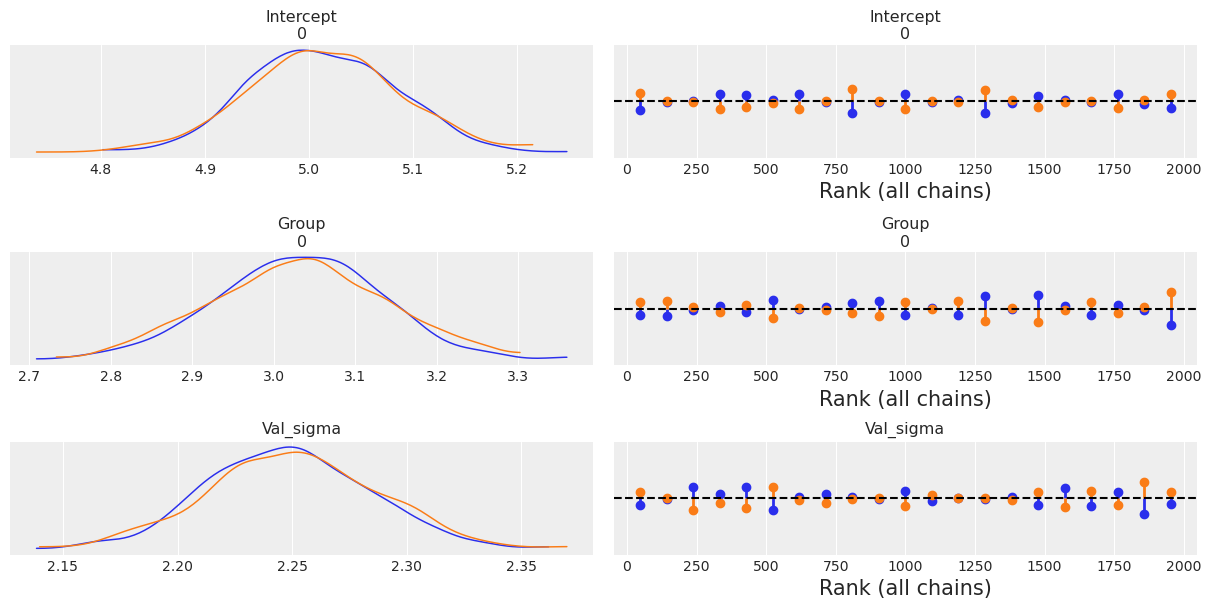

In [8]:
az.plot_trace(results, kind='rank_vlines');

In [9]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept[0],5.013,0.071,4.880,5.143,0.002,0.002,1014.0,1012.0,1017.0,1347.0,1.0
Group[0],3.031,0.103,2.825,3.214,0.003,0.002,1033.0,1033.0,1035.0,1098.0,1.0
Val_sigma,2.250,0.036,2.183,2.318,0.001,0.001,1334.0,1333.0,1339.0,1258.0,1.0


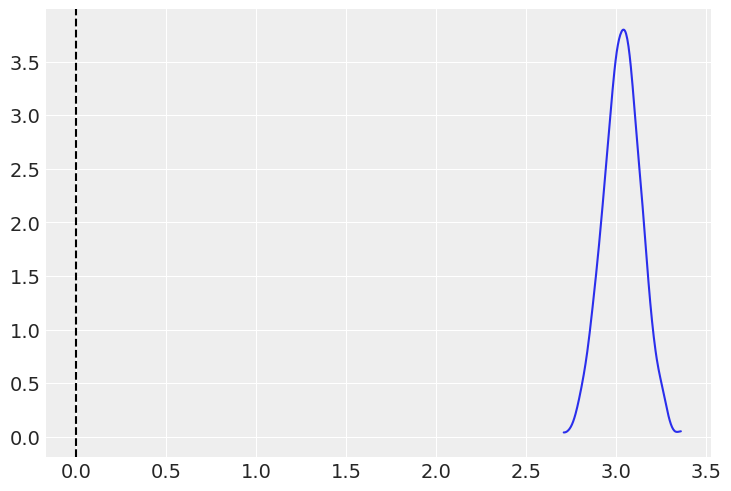

In [10]:
# Grab just the posterior of the term of interest (group)
group_posterior = results.posterior['Group'].values
ax = az.plot_kde(group_posterior)
ax.axvline(0, 0, 3, linestyle='--', color='k');

In [11]:
# Probabiliy that posterior is > 0
(group_posterior > 0).mean()

1.0